<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/img_classification_LDA_L09_prof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [0]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Load data

In [5]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro_without_nan.csv'

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
public_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
PA_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
#easy features paper
#Energy, Entropy, Kurtosis, Maximum, Mean, Mean Absolute Deviation,
#Median, Minimum, Range, RMS Value, Skewness, Standard Deviation, 
#Uniformity, Variance, Compactness, 
#Maximum 3D diameter, Spherical Disproportion, Sphericity, 
#Surface Area, Surface-to-Volume Ratio, and Volume

#easy_features_dataset
#VoxelVolume, Maximum3DDiameter, MeshVolume, MajorAxisLength,
#Sphericity, LeastAxisLength, Elongation, SurfaceVolumeRatio,
#Maximum2DDiameterSlice, Flatness, SurfaceArea, MinorAxisLength,
#Skewness, Uniformity, Median, Energy, MeanAbsoluteDeviation, 
#TotalEnergy?, Maximum, Minimum, Entropy, Range, Variance, Kurtosis,
#Mean

In [0]:
easy_features_dataset = ['VoxelVolume', 'Maximum3DDiameter', 'MeshVolume', 'MajorAxisLength', 'Sphericity', 
                         'LeastAxisLength', 'Elongation', 'SurfaceVolumeRatio', 'Maximum2DDiameterSlice', 
                         'Flatness', 'SurfaceArea', 'MinorAxisLength', 'Skewness', 'Uniformity', 'Median', 
                         'Energy', 'MeanAbsoluteDeviation', 'TotalEnergy', 'Maximum', 'Minimum', 'Entropy', 
                         'Range', 'Variance', 'Kurtosis', 'Mean']


In [0]:
public_data = public_data[easy_features_dataset]

In [0]:
PA_data = PA_data[easy_features_dataset]

In [17]:
public_data.columns

Index(['VoxelVolume', 'Maximum3DDiameter', 'MeshVolume', 'MajorAxisLength',
       'Sphericity', 'LeastAxisLength', 'Elongation', 'SurfaceVolumeRatio',
       'Maximum2DDiameterSlice', 'Flatness', 'SurfaceArea', 'MinorAxisLength',
       'Skewness', 'Uniformity', 'Median', 'Energy', 'MeanAbsoluteDeviation',
       'TotalEnergy', 'Maximum', 'Minimum', 'Entropy', 'Range', 'Variance',
       'Kurtosis', 'Mean'],
      dtype='object')

In [0]:
public_labels = df_train.Histology

In [0]:
PA_labels = df_test.Histology

#Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(public_data, public_labels, test_size=0.3, stratify=public_labels, random_state=1)

In [22]:
X_train.shape

(91, 25)

In [23]:
y_train

59                  large cell
60                  large cell
23                  large cell
121    squamous cell carcinoma
69                  large cell
                ...           
117    squamous cell carcinoma
55                  large cell
123    squamous cell carcinoma
126    squamous cell carcinoma
73                  large cell
Name: Histology, Length: 91, dtype: object

#Vettorizzare i label

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_labels_encoded = encoder.fit_transform(y_train)
test_labels_encoded = encoder.transform(y_test)

#Z score

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data_stand = scaler.fit_transform(X_train)
test_data_stand = scaler.transform(X_test)

#LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
lda = LinearDiscriminantAnalysis(n_components=2)
train_data_stand_lda = lda.fit_transform(train_data_stand, train_labels_encoded)
test_data_stand_lda = lda.transform(test_data_stand)

In [29]:
train_data_stand_lda.shape

(91, 2)

#Z score dei dati dopo LDA

In [0]:
from sklearn.preprocessing import StandardScaler
scaler_2 = StandardScaler()
train_data_stand_lda_stand = scaler_2.fit_transform(train_data_stand_lda)
test_data_stand_lda_stand = scaler_2.transform(train_data_stand_lda)

#Classifier comparison

ValueError: ignored

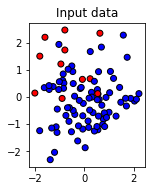

In [44]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


figure = plt.figure(figsize=(27, 9))
i = 1

x_min, x_max = train_data_stand_lda_stand[:, 0].min() - .5, train_data_stand_lda_stand[:, 0].max() + .5
y_min, y_max = train_data_stand_lda_stand[:, 1].min() - .5, train_data_stand_lda_stand[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))



# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

ax.set_title("Input data")
# Plot the training points
ax.scatter(train_data_stand_lda_stand[:, 0], train_data_stand_lda_stand[:, 1], c=train_labels_encoded, cmap=cm_bright,
               edgecolors='k')
# Plot the testing points
ax.scatter(test_data_stand_lda_stand[:, 0], test_data_stand_lda_stand[:, 1], c=test_labels_encoded, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

    # iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(train_data_stand_lda_stand, train_labels_encoded)
    score = clf.score(test_data_stand_lda_stand, test_labels_encoded)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(train_data_stand_lda_stand[:, 0], train_data_stand_lda_stand[:, 1], c=train_labels_encoded, cmap=cm_bright,
                edgecolors='k')
    # Plot the testing points
    ax.scatter(test_data_stand_lda_stand[:, 0], test_data_stand_lda_stand[:, 1], c=test_labels_encoded, cmap=cm_bright,
                edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

In [46]:
train_labels_encoded.shape

(91,)

In [0]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [37]:
linearly_separable 


(array([[-0.17749658,  0.93049627],
        [ 1.97742406,  1.76615529],
        [ 1.80002379,  1.7003428 ],
        [-0.77083686,  2.35916348],
        [-0.30800901,  1.59406316],
        [ 0.61472141,  2.43489824],
        [ 1.0909431 ,  2.21663402],
        [-0.83488954,  2.35868875],
        [ 2.47946499,  1.33418967],
        [ 1.19926597,  1.82681392],
        [ 2.18506184,  0.8226875 ],
        [ 1.68423203,  1.0411311 ],
        [ 1.14621135,  2.07048527],
        [ 1.35596945,  0.56802498],
        [ 1.38520748,  1.82607238],
        [ 1.86729217,  1.18692699],
        [ 0.31227376,  2.24605353],
        [-0.08183484,  1.70065511],
        [ 0.90484472,  2.60683016],
        [-0.4358609 ,  2.0151414 ],
        [ 0.81441196,  2.13546784],
        [ 3.10874312,  2.26786504],
        [-0.25574217,  1.71281146],
        [ 1.88663027,  2.72089513],
        [ 2.29503547,  3.89267759],
        [-0.11415626,  0.85593357],
        [ 1.69703537,  3.47717799],
        [ 1.83855775,  0.926

In [0]:
from sklearn.datasets import make_moons, make_circles, make_classification


datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

In [39]:
datasets

[(array([[ 0.03159499,  0.98698776],
         [ 2.11509784, -0.04624397],
         [ 0.88248972, -0.07575606],
         [-0.0551441 , -0.03733246],
         [ 0.82954503, -0.53932149],
         [ 2.11285708,  0.66208353],
         [ 0.5696927 ,  0.33744136],
         [ 0.95217454, -0.75307471],
         [-0.02922115,  0.39287336],
         [ 1.71579557,  0.36069454],
         [-0.27883014,  0.61420539],
         [ 2.00344509, -0.3091496 ],
         [ 1.50009616, -0.74636376],
         [ 1.22540835,  1.19793017],
         [ 0.46730819,  0.54703192],
         [-0.36653222,  1.11971633],
         [ 0.30124459,  1.23315697],
         [ 0.30430746,  0.82373935],
         [-0.23712492,  0.77876034],
         [ 1.16339832,  0.55290238],
         [-0.59702417,  0.6572361 ],
         [ 0.46356735, -0.1951543 ],
         [ 0.68451111,  0.75287685],
         [ 0.70515699, -0.45892444],
         [-0.65805008, -0.12944211],
         [-0.74662946, -0.3829632 ],
         [ 0.60585226,  0.31252842],
 

In [40]:
for ds_cnt, ds in enumerate(datasets):
  print(ds_cnt)
  print(ds)

0
(array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 1.919806